# 🚀 Objective: Categorical Naive Bayes Implementation
# 💡 Own Code: Python Implementation for Digesting Concept
# 🎯 Purpose: Mastering the Essence of Naive Bayes!


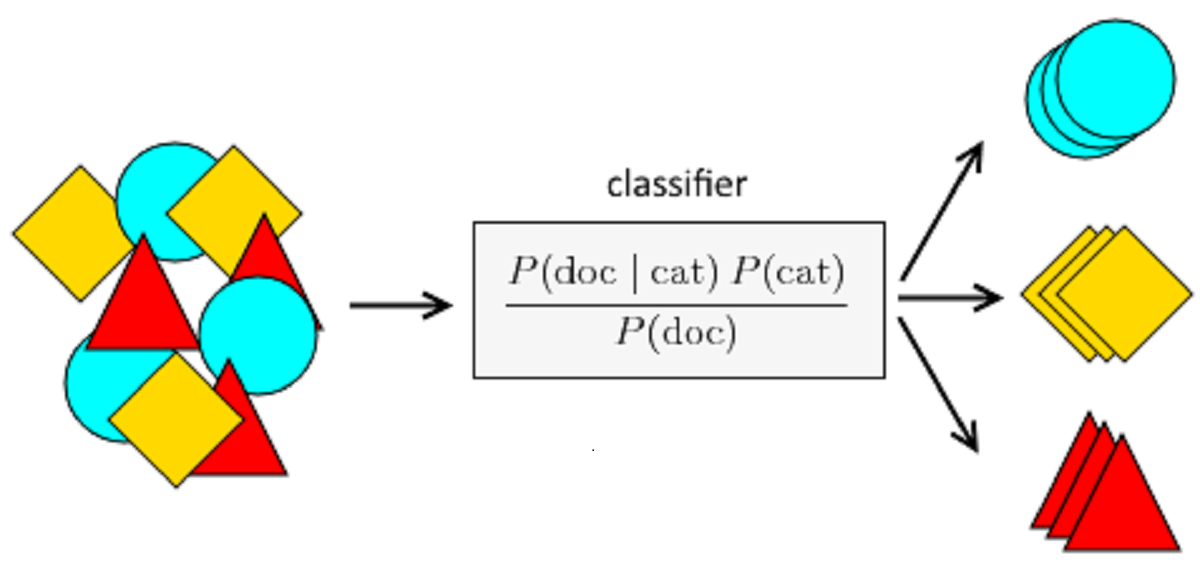


# Categorical Naive Bayes
- CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature is independent
- P(A ∩ B) = P(A) . P(B) - Multiplication Rule of Probability - If A and B are two independent events

# 1. Load Python Modules

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# 2. Read the Dataset from CSV file  - Using Pandas

In [2]:
#Loading the PlayTennis data
tennis_df = pd.read_csv("PlayTennis.csv")

# 3. Basic Inspection on given dataset

In [3]:
tennis_df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [5]:
#convert bool data type to categorical
tennis_df['windy'] = tennis_df['windy'].map(lambda x: "True" if x else "False")

In [6]:
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [7]:
tennis_df.select_dtypes(include='object').columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

# 4. Implementation of the own code - using python

In [8]:
# Assuming tennis_df is your DataFrame
num_yes_labels = len(tennis_df[tennis_df['play']=='yes'])
num_no_labels = len(tennis_df[tennis_df['play']=='no'])
total_lables = len(tennis_df)
print("num_yes_labels",num_yes_labels)
print("num_no_labels",num_no_labels)
print("total_lables",total_lables)

num_yes_labels 9
num_no_labels 5
total_lables 14


In [9]:
# Initialize an empty dictionary to store category probabilities
category_probabilities = {}

for col in tennis_df.select_dtypes(include='object').columns:
    # Perform cross-tabulation
    cross_tab = pd.crosstab(tennis_df[col], tennis_df['play'])
    table = tabulate(cross_tab, headers='keys', tablefmt='fancy_grid')
    print(table)
    print("===============================")
    
    # Extract probabilities for 'yes' and 'no' from the cross-tabulation
    prob_yes = round(cross_tab['yes']/num_yes_labels,2)
    prob_no = round(cross_tab['no']/num_no_labels,2)
    
    # Store probabilities in the dictionary
    category_probabilities[col] = {'yes': prob_yes.to_dict(), 'no': prob_no.to_dict()}

category_probabilities['play']['yes']['yes'] = round(num_yes_labels/total_lables,2)
category_probabilities['play']['no']['no']=round(num_no_labels/total_lables,2)
print(category_probabilities)




╒═══════════╤══════╤═══════╕
│ outlook   │   no │   yes │
╞═══════════╪══════╪═══════╡
│ overcast  │    0 │     4 │
├───────────┼──────┼───────┤
│ rainy     │    2 │     3 │
├───────────┼──────┼───────┤
│ sunny     │    3 │     2 │
╘═══════════╧══════╧═══════╛
╒════════╤══════╤═══════╕
│ temp   │   no │   yes │
╞════════╪══════╪═══════╡
│ cool   │    1 │     3 │
├────────┼──────┼───────┤
│ hot    │    2 │     2 │
├────────┼──────┼───────┤
│ mild   │    2 │     4 │
╘════════╧══════╧═══════╛
╒════════════╤══════╤═══════╕
│ humidity   │   no │   yes │
╞════════════╪══════╪═══════╡
│ high       │    4 │     3 │
├────────────┼──────┼───────┤
│ normal     │    1 │     6 │
╘════════════╧══════╧═══════╛
╒═════════╤══════╤═══════╕
│ windy   │   no │   yes │
╞═════════╪══════╪═══════╡
│ False   │    2 │     6 │
├─────────┼──────┼───────┤
│ True    │    3 │     3 │
╘═════════╧══════╧═══════╛
╒════════╤══════╤═══════╕
│ play   │   no │   yes │
╞════════╪══════╪═══════╡
│ no     │    5 │     0 │
├─

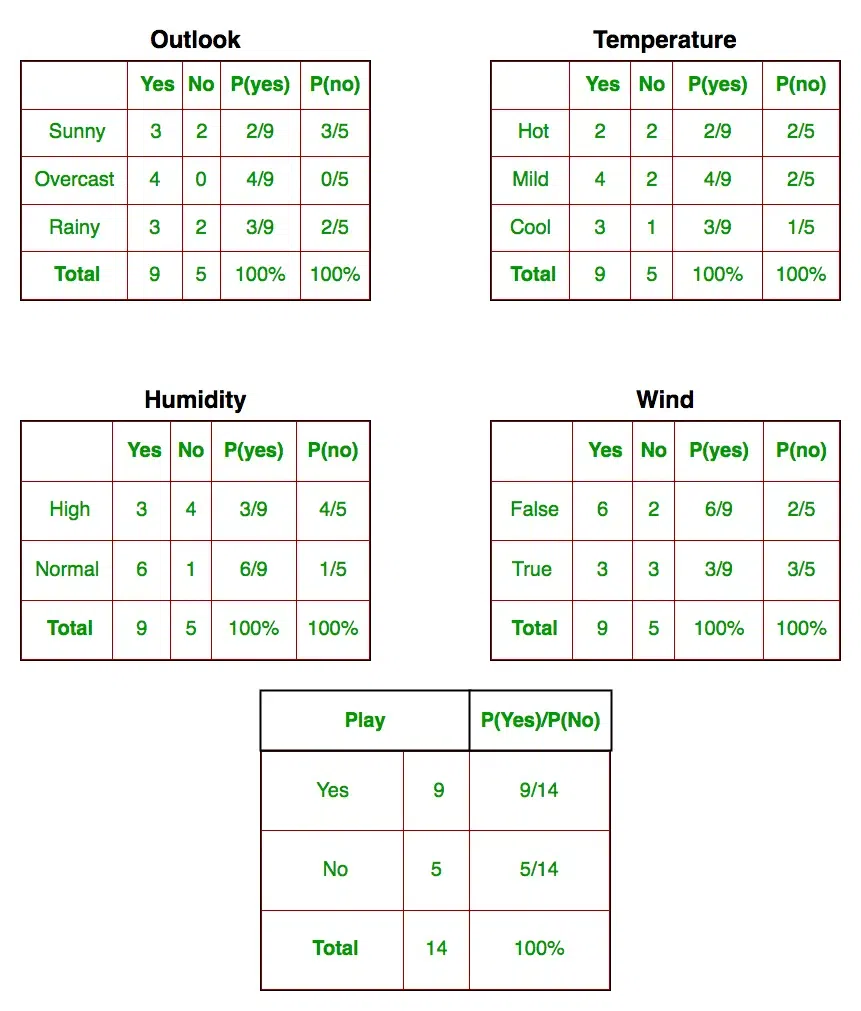

In [10]:
def CategoricalNB(d):
    """CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data. 
    It assumes that each feature is independent"""
    
    # Calculate the probability of playing tennis given the input data when the outcome is 'yes'
    prob_play_tennis_yes = (
        category_probabilities["outlook"]["yes"][d["outlook"]] *
        category_probabilities["temp"]["yes"][d["temp"]] *
        category_probabilities["humidity"]["yes"][d["humidity"]] *
        category_probabilities['windy']['yes'][d['windy']] *
        category_probabilities['play']['yes']['yes']
    )
    
    # Calculate the probability of not playing tennis given the input data when the outcome is 'no'
    prob_play_tennis_no = (
        category_probabilities["outlook"]["no"][d["outlook"]] *
        category_probabilities["temp"]["no"][d["temp"]] *
        category_probabilities["humidity"]["no"][d["humidity"]] *
        category_probabilities['windy']['no'][d['windy']] *
        category_probabilities['play']['no']['no']
    )
    
    # Print the probability of playing tennis when the outcome is 'yes'
    print("prob_play_tennis_yes", prob_play_tennis_yes)
    
    # Print the probability of not playing tennis when the outcome is 'no'
    print("prob_play_tennis_no",prob_play_tennis_no)
    
    # Compare the probabilities and print the decision whether to play tennis or not
    if prob_play_tennis_yes > prob_play_tennis_no:
        print("Play tennis: Yes")
    else:
        print("Play tennis: No")


# 5. Test the code / Model

In [11]:
d = {"outlook":"sunny", "temp":"mild","humidity":"normal","windy":"True"}
print(d)
CategoricalNB(d)

{'outlook': 'sunny', 'temp': 'mild', 'humidity': 'normal', 'windy': 'True'}
prob_play_tennis_yes 0.013697587200000002
prob_play_tennis_no 0.010367999999999999
Play tennis: Yes


In [12]:
d = {"outlook":"sunny", "temp":"hot","humidity":"high","windy":"False"}
print(d)
CategoricalNB(d)

{'outlook': 'sunny', 'temp': 'hot', 'humidity': 'high', 'windy': 'False'}
prob_play_tennis_yes 0.006848793600000001
prob_play_tennis_no 0.027648000000000002
Play tennis: No


# 6. Conclusions

1. It assumes that each feature is independent
2. For categorically distributed data - categorical inputs
3. There is issue the zero probability of given feature w.r.t output/target - solved using Laplace Smoothing